In [ ]:
import tensorflow

In [ ]:
import tensorflow.keras as keras

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import nltk
import tensorflow as tf
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Use pd.read_json("../Sarcasm_Headlines_Dataset_v2.json",lines=True) if not in colab
data = pd.read_json("./Sarcasm_Headlines_Dataset_v2.json",lines=True)

In [ ]:
# remove duplicate headlines
data=data.drop(data[data['headline'].duplicated()].index,axis=0)

In [ ]:
sarc_cnt = len(data.query('is_sarcastic==1'))
non_sarc_cnt = len(data.query('is_sarcastic==0'))

# Summary of sarcastic lines
print(f'There are {sarc_cnt} sarcastic headlines and {non_sarc_cnt} non-sarcastic headlines')

There are 13552 sarcastic headlines and 14951 non-sarcastic headlines


---

## Part 2: Data Processing/Cleaning

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stwrds = set(stopwords.words('english'))


In [ ]:
# # method to clean a given headline by lowercasing the string, removing spaces, and removing stopwords
# def clean_headlines(headline):
#     headline = headline.lower()
#     headline_split = headline.split()
#     cleaned_headline = []
#     for word in headline_split:
#         if word not in stwrds:
#             cleaned_headline.append(word)
    
#     cleaned_line = " ".join(cleaned_headline)
#     return cleaned_line

In [ ]:
# # applies function to all entries
# data['headline'].apply(clean_headlines)

0        thirtysomething scientists unveil doomsday clo...
1        dem rep. totally nails congress falling short ...
2             eat veggies: 9 deliciously different recipes
3             inclement weather prevents liar getting work
4        mother comes pretty close using word 'streamin...
                               ...                        
28614               jews celebrate rosh hashasha something
28615    internal affairs investigator disappointed con...
28616    beautiful acceptance speech week came queer ko...
28617    mars probe destroyed orbiting spielberg-gates ...
28618                              dad clarifies food stop
Name: headline, Length: 28503, dtype: object

In [ ]:
# # train-test split
# headline_target = data['is_sarcastic']
# headline_attributes = data['headline']
# attribute_train, attribute_test, labels_train, labels_test = train_test_split(headline_attributes, headline_target, test_size=0.30)


In [ ]:
# # form dataframes for training and test sets
# att_train = pd.DataFrame(attribute_train)
# label_train = pd.DataFrame(labels_train)
# att_test = pd.DataFrame(attribute_test)
# label_test = pd.DataFrame(labels_test)

# training_set = label_train.join(att_train)
# test_set = label_test.join(att_test)

In [ ]:
# # determines amount of unqiue words in our data
# # this takes forever because set operations are slow

# unqiue_words = set()
# for headline in headline_attributes:
#     unqiue_words = unqiue_words.union(set(headline.split()))

# print(f'{len(unqiue_words)} unqiue words in the headline data')

38234 unqiue words in the headline data


In [ ]:
data['tokenized_text'] = data.headline.apply(tokenizer.tokenize)

In [ ]:
data['indexed_tokens'] = data.tokenized_text.apply(tokenizer.convert_tokens_to_ids)

In [ ]:
data.head(5)

,is_sarcastic,headline,article_link,tokenized_text,indexed_tokens
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...,"[thirty, ##some, ##thing, scientists, un, ##ve...","[4228, 14045, 20744, 6529, 4895, 3726, 4014, 1..."
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...,"[dem, rep, ., totally, nails, why, congress, i...","[17183, 16360, 1012, 6135, 10063, 2339, 3519, ..."
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...,"[eat, your, ve, ##gg, ##ies, :, 9, delicious, ...","[4521, 2115, 2310, 13871, 3111, 1024, 1023, 12..."
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...,"[inc, ##lem, ##ent, weather, prevents, liar, f...","[4297, 16930, 4765, 4633, 16263, 16374, 2013, ..."
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...,"[mother, comes, pretty, close, to, using, word...","[2388, 3310, 3492, 2485, 2000, 2478, 2773, 100..."


In [ ]:
for tup in zip(data.tokenized_text[:1], data.indexed_tokens[:1]):
    for tup2 in zip(tup[0],tup[1]):
        print('{:<12} {:>6,}'.format(tup2[0], tup2[1]))


thirty        4,228
##some       14,045
##thing      20,744
scientists    6,529
un            4,895
##ve          3,726
##il          4,014
doom         12,677
##sd         16,150
##ay          4,710
clock         5,119
of            1,997
hair          2,606
loss          3,279


The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.


In [ ]:
segments_ids = [1] * len(data.tokenized_text)

In [ ]:
data['tokens_tensor'] = data.indexed_tokens.apply(torch.tensor)
data['segments_tensors'] = torch.tensor([1]* len(data.tokenized_text))

In [ ]:
data.head()

,is_sarcastic,headline,article_link,tokenized_text,indexed_tokens,tokens_tensor,segments_tensors
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...,"[thirty, ##some, ##thing, scientists, un, ##ve...","[4228, 14045, 20744, 6529, 4895, 3726, 4014, 1...","[tensor(4228), tensor(14045), tensor(20744), t...",1
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...,"[dem, rep, ., totally, nails, why, congress, i...","[17183, 16360, 1012, 6135, 10063, 2339, 3519, ...","[tensor(17183), tensor(16360), tensor(1012), t...",1
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...,"[eat, your, ve, ##gg, ##ies, :, 9, delicious, ...","[4521, 2115, 2310, 13871, 3111, 1024, 1023, 12...","[tensor(4521), tensor(2115), tensor(2310), ten...",1
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...,"[inc, ##lem, ##ent, weather, prevents, liar, f...","[4297, 16930, 4765, 4633, 16263, 16374, 2013, ...","[tensor(4297), tensor(16930), tensor(4765), te...",1
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...,"[mother, comes, pretty, close, to, using, word...","[2388, 3310, 3492, 2485, 2000, 2478, 2773, 100...","[tensor(2388), tensor(3310), tensor(3492), ten...",1


In [ ]:
model = BertModel.from_pretrained('bert-base-uncased',
                                  output_hidden_states = True, # Whether the model returns all hidden-states.
                                  )

# Put the model in "evaluation" mode, meaning feed-forward operation.
model.eval()


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
          

# new stuff

In [ ]:
!pip install transformers
from transformers import TFBertModel, BertTokenizer


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 30.4 MB/s 
     |████████████████████████████████| 182 kB 77.0 MB/s 
     |████████████████████████████████| 7.6 MB 55.0 MB/s 


# Hopefully that would work

In [ ]:
labels = data.is_sarcastic.values
sentences = data.headline.values
PRE_TRAINED_MODEL_NAME = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME,do_lower_case = True)

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
def encoder(sentences):
    ids = []
    for sentence in sentences:
        encoding = tokenizer.encode_plus(
        sentence,
        max_length=16,
        truncation = True,
        add_special_tokens=True,
        return_token_type_ids=False,
        padding="max_length",
        return_attention_mask=False)
        ids.append(encoding['input_ids'])
    return ids

train_sents,test_sents, train_labels, test_labels  = train_test_split(sentences,labels,test_size=0.15)
train_ids = encoder(train_sents)
test_ids = encoder(test_sents) 

In [ ]:
train_ids = tf.convert_to_tensor(train_ids)
test_ids = tf.convert_to_tensor(test_ids)
test_labels = tf.convert_to_tensor(test_labels)
train_labels = tf.convert_to_tensor(train_labels)

In [ ]:
bert_encoder = TFBertModel.from_pretrained('bert-base-uncased')
input_word_ids = tf.keras.Input(shape=(16,), dtype=tf.int32, name="input_word_ids")  
embedding = bert_encoder([input_word_ids])
dense = tf.keras.layers.Lambda(lambda seq: seq[:, 0, :])(embedding[0])
dense = tf.keras.layers.Dense(128, activation='relu')(dense)
dense = tf.keras.layers.Dropout(0.2)(dense)   
output = tf.keras.layers.Dense(1, activation='sigmoid')(dense)    
checkpointer=ModelCheckpoint(filepath='LSTM_model.hdf5', save_best_only=True, verbose=2)

model = tf.keras.Model(inputs=[input_word_ids], outputs=output)  


Downloading:   0%|          | 0.00/536M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
model.compile(tf.keras.optimizers.Adam(1e-5), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_word_ids (InputLayer)  [(None, 16)]             0         
                                                                 
 tf_bert_model (TFBertModel)  TFBaseModelOutputWithPoo  109482240
                             lingAndCrossAttentions(l            
                             ast_hidden_state=(None,             
                             16, 768),                           
                              pooler_output=(None, 76            
                             8),                                 
                              past_key_values=None, h            
                             idden_states=None, atten            
                             tions=None, cross_attent            
                             ions=None)                          
                                                             

In [ ]:
history = model.fit(x = train_ids, y = train_labels, epochs = 3, verbose = 1, batch_size = 256, validation_data = (test_ids, test_labels), callbacks=[checkpointer])

Epoch 1/3


95/95 [==============================] - ETA: 0s - loss: 0.4107 - accuracy: 0.8038
Epoch 1: val_loss improved from inf to 0.27296, saving model to LSTM_model.hdf5
95/95 [==============================] - 103s 895ms/step - loss: 0.4107 - accuracy: 0.8038 - val_loss: 0.2730 - val_accuracy: 0.8845
Epoch 2/3
95/95 [==============================] - ETA: 0s - loss: 0.2491 - accuracy: 0.8976
Epoch 2: val_loss improved from 0.27296 to 0.25603, saving model to LSTM_model.hdf5
95/95 [==============================] - 85s 892ms/step - loss: 0.2491 - accuracy: 0.8976 - val_loss: 0.2560 - val_accuracy: 0.8920
Epoch 3/3
95/95 [==============================] - ETA: 0s - loss: 0.1917 - accuracy: 0.9254
Epoch 3: val_loss improved from 0.25603 to 0.20963, saving model to LSTM_model.hdf5
95/95 [==============================] - 84s 884ms/step - loss: 0.1917 - accuracy: 0.9254 - val_loss: 0.2096 - val_accuracy: 0.9167


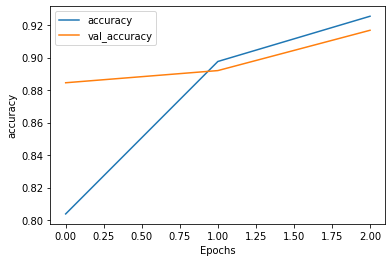

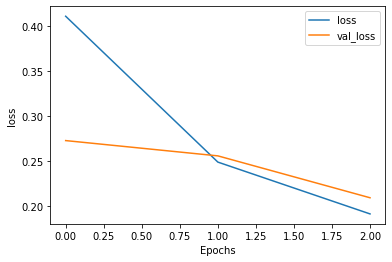

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [ ]:
from keras.models import load_model
model = load_model('model.h5')

In [ ]:
predictions = model(test_ids[0:10])

In [ ]:
history = model.fit(x = train_ids, y = train_labels, epochs = 3, verbose = 1, batch_size = 32, validation_data = (test_ids, test_labels), callbacks=[checkpointer])

In [ ]:
! pip install shap

In [ ]:
x = test_sents[0]
encoding = tokenizer.encode_plus(
            x,
            max_length=16,
            truncation = True,
            add_special_tokens=True,
            return_token_type_ids=False,
            padding="max_length",
            return_attention_mask=False)
asinput = encoding.input_ids
outputs = model(tf.convert_to_tensor([asinput]))[0]
print(outputs)
np.log(outputs[0]/(1-outputs[0]))

tf.Tensor([0.994228], shape=(1,), dtype=float32)


5.1489487

In [ ]:
import shap
import transformers
tokenizer = transformers.DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")
def f(x):
    x = test_sents[0]
    encoding = tokenizer.encode_plus(
                x,
                max_length=16,
                truncation = True,
                add_special_tokens=True,
                return_token_type_ids=False,
                padding="max_length",
                return_attention_mask=False)
    asinput = encoding.input_ids
    outputs = model(tf.convert_to_tensor([asinput]))[0]
    val = np.log(outputs[0]/(1-outputs[0]))    
    return val

explainer = shap.Explainer(f, tokenizer)
shap_values = explainer(test_sents[:1], fixed_context=1)

# shap_values = explainer(test_sents[0:19])

# for i in range (10):
#     shap.plots.text(shap_values[i])


TypeError: ignored

In [ ]:
train_sents[0:5]

In [ ]:
!pip install nlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 23.2 MB/s 
     |████████████████████████████████| 212 kB 64.2 MB/s 


In [ ]:
import shap
import transformers
import nlp
import torch
import numpy as np
import scipy as sp

# load a BERT sentiment analysis model
tokenizer2 = BertTokenizer
model2 = transformers.DistilBertForSequenceClassification.from_pretrained(
    "distilbert-base-uncased-finetuned-sst-2-english"
).cuda()

# define a prediction function
def f(x):
    tv = torch.tensor([tokenizer.encode(v, padding='max_length', max_length=500, truncation=True) for v in x]).cuda()
    outputs = model2(tv)[0].detach().cpu().numpy()
    scores = (np.exp(outputs).T / np.exp(outputs).sum(-1)).T
    val = sp.special.logit(scores[:,1]) # use one vs rest logit units
    x = test_sents[0]
    encoding = tokenizer.encode_plus(
                x,
                max_length=16,
                truncation = True,
                add_special_tokens=True,
                return_token_type_ids=False,
                padding="max_length",
                return_attention_mask=False)
    asinput = encoding.input_ids
    outputs = model(tf.convert_to_tensor([asinput]))[0]
    print(val)
    return val

# build an explainer using a token masker
explainer2 = shap.Explainer(f, tokenizer)

# explain the model's predictions on IMDB reviews
imdb_train = nlp.load_dataset("imdb")["train"]

In [ ]:
shap_values2 = explainer2(test_sents[:1], fixed_context=1)


RuntimeError: ignored

In [ ]:
shap.plots.text(shap_values2[0])


In [ ]:
x = test_sents[0]
tv = torch.tensor([tokenizer.encode(v, padding='max_length', max_length=500, truncation=True) for v in x]).cuda()
outputs = model2(tv)[0].detach().cpu().numpy()

RuntimeError: ignored

In [ ]:
!pip install numba
from numba import cuda
device = cuda.get_current_device() 
device.reset()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# New day, new failure

In [ ]:
!pip install transformers

In [25]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 64,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Print sentence 0, now as a list of IDs.
print('Original: ', sentences[0])
print('Token IDs:', input_ids[0])


NameError: ignored

In [24]:
import pandas as pd
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
from torch.utils.data import TensorDataset, random_split

# Combine the training inputs into a TensorDataset.
dataset = TensorDataset(input_ids, attention_masks, labels)

# Create a 90-10 train-validation split.

# Calculate the number of samples to include in each set.
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size

# Divide the dataset by randomly selecting samples.
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

Loading BERT tokenizer...


Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

NameError: ignored

In [ ]:
dataset

In [12]:
dataset = pd.read_json("./Sarcasm_Headlines_Dataset_v2.json",lines=True)


In [11]:
from torch.utils.data import TensorDataset, random_split

In [13]:
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size

# Divide the dataset by randomly selecting samples.
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])


In [14]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it 
# here. For fine-tuning BERT on a specific task, the authors recommend a batch 
# size of 16 or 32.
batch_size = 32

# Create the DataLoaders for our training and validation sets.
# We'll take training samples in random order. 
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

In [20]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it 
# here. For fine-tuning BERT on a specific task, the authors recommend a batch 
# size of 16 or 32.
batch_size = 32

# Create the DataLoaders for our training and validation sets.
# We'll take training samples in random order. 
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

In [ ]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 2, # The number of output labels--2 for binary classification.
                    # You can increase this for multi-class tasks.   
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.
model.cuda()

In [4]:
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )

/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [15]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs. The BERT authors recommend between 2 and 4. 
# We chose to run for 4, but we'll see later that this may be over-fitting the
# training data.
epochs = 4

# Total number of training steps is [number of batches] x [number of epochs]. 
# (Note that this is not the same as the number of training samples).
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [17]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [21]:
import random
import numpy as np
import torch

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# We'll store a number of quantities such as training and validation loss, 
# validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # The documentation for this `model` function is here: 
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        # It returns different numbers of parameters depending on what arguments
        # arge given and what flags are set. For our useage here, it returns
        # the loss (because we provided labels) and the "logits"--the model
        # outputs prior to activation.
        loss, logits = model(b_input_ids, 
                             token_type_ids=None, 
                             attention_mask=b_input_mask, 
                             labels=b_labels)

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_train_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)            
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using 
        # the `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            # The documentation for this `model` function is here: 
            # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
            # Get the "logits" output by the model. The "logits" are the output
            # values prior to applying an activation function like the softmax.
            (loss, logits) = model(b_input_ids, 
                                   token_type_ids=None, 
                                   attention_mask=b_input_mask,
                                   labels=b_labels)
            
        # Accumulate the validation loss.
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_eval_accuracy += flat_accuracy(logits, label_ids)
        

    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 4 ========
Training...


KeyError: ignored